*IMPORTING NECESSARY LIBRARIES FOR PREDICTION*

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

**IMPORTING STOCK DATASET USING WEB SCRAPING**

In [181]:
df_yahoo = yf.download('FB',start='2020-09-15',end='2021-11-15',interval = "1h",progress=False,auto_adjust=True)
df_yahoo.head()

,Open,High,Low,Close,Volume
2020-09-14 14:30:00-04:00,268.190002,268.380005,266.630005,267.199890,0
2020-09-14 15:30:00-04:00,267.190002,268.109985,265.700012,266.140015,3237940
2020-09-15 09:30:00-04:00,270.670013,274.519989,269.299988,273.160004,4845432
2020-09-15 10:30:00-04:00,273.119995,273.730011,270.660095,272.109985,2020510
2020-09-15 11:30:00-04:00,272.109985,273.450012,271.839996,273.000000,1406904


In [182]:
df_yahoo.shape

(2061, 5)

>CHECKING INFORMATION OF DATASET

In [183]:
df_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2061 entries, 2020-09-14 14:30:00-04:00 to 2021-11-12 15:30:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2061 non-null   float64
 1   High    2061 non-null   float64
 2   Low     2061 non-null   float64
 3   Close   2061 non-null   float64
 4   Volume  2061 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 96.6 KB


In [184]:
df=df_yahoo.drop("Volume",axis=1)
df.head(2)

,Open,High,Low,Close
2020-09-14 14:30:00-04:00,268.190002,268.380005,266.630005,267.199890
2020-09-14 15:30:00-04:00,267.190002,268.109985,265.700012,266.140015


In [185]:
df.index.rename('Date', inplace=True)
df.head(2)

,Open,High,Low,Close
Date,,,,
2020-09-14 14:30:00-04:00,268.190002,268.380005,266.630005,267.199890
2020-09-14 15:30:00-04:00,267.190002,268.109985,265.700012,266.140015


>SORT DATA BY DATE (if misarranged)

*SINCE THE DATA IS WEBSCRAPED IT WILL BE IN ASCENDING ORDER*

In [186]:
df=df.sort_values(by=['Date'],ignore_index=True)
df.head()

,Open,High,Low,Close
0,268.190002,268.380005,266.630005,267.199890
1,267.190002,268.109985,265.700012,266.140015
2,270.670013,274.519989,269.299988,273.160004
3,273.119995,273.730011,270.660095,272.109985
4,272.109985,273.450012,271.839996,273.000000


`check stationary`

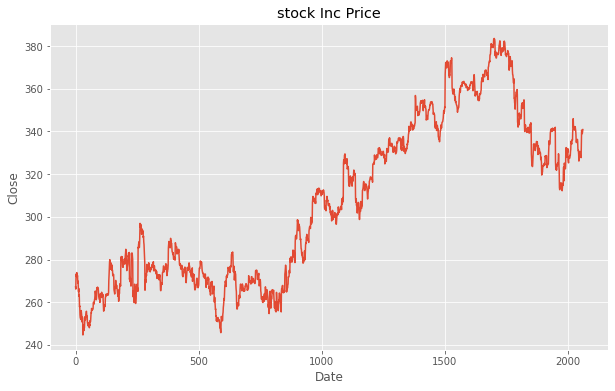

In [187]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df['Close'])
plt.title("stock Inc Price")
plt.show()

**THE TARGET VARIBLE IS NON STATIONARY AND TO PERFORM TIME SERIES DATA SHOULD FOLLOW STATIONARITY**

>CORRELATION CHECK AND CORRELLOGRAM

In [188]:
corr=df.corr()
corr

,Open,High,Low,Close
Open,1.000000,0.999487,0.999447,0.998996
High,0.999487,1.000000,0.999186,0.999487
Low,0.999447,0.999186,1.000000,0.999492
Close,0.998996,0.999487,0.999492,1.000000


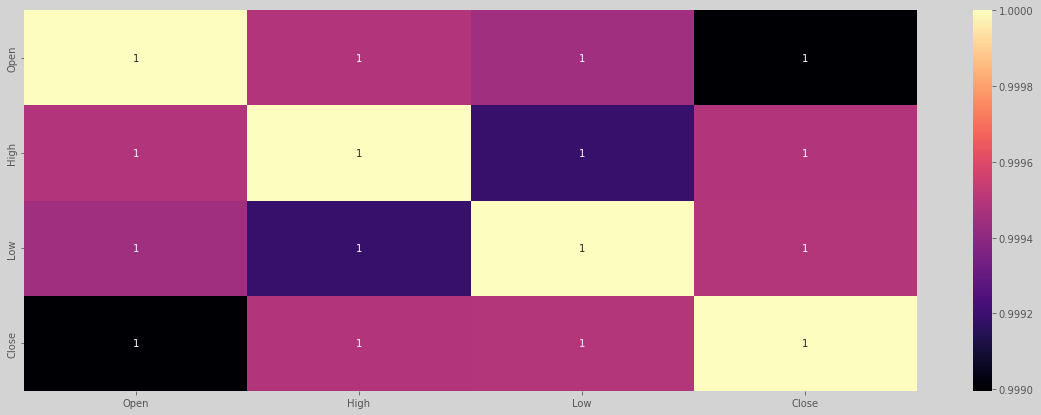

In [189]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue')
sns.heatmap(corr, annot=True, cmap='magma');
plt.show()

**TO MAKE DATA STATIONARY NEED TO PERFORM TIME SHIFT**

*Time Shifts are when a condition often result in a time series with a horizontal pattern to shift to a new level at some point in time.*

In [190]:
df["s1"]=df["Close"]-df['Close'].shift(1)
df.head(15)

,Open,High,Low,Close,s1
0,268.190002,268.380005,266.630005,267.199890,NaN
1,267.190002,268.109985,265.700012,266.140015,-1.059875
2,270.670013,274.519989,269.299988,273.160004,7.019989
3,273.119995,273.730011,270.660095,272.109985,-1.050018
4,272.109985,273.450012,271.839996,273.000000,0.890015
5,273.029999,274.200012,272.630005,273.859985,0.859985
6,273.899994,273.929993,272.649994,273.059998,-0.799988
7,273.065002,273.899994,269.549988,271.959991,-1.100006
8,271.989990,272.700012,270.230011,272.459991,0.500000
9,267.290009,272.440002,267.290009,268.839996,-3.619995


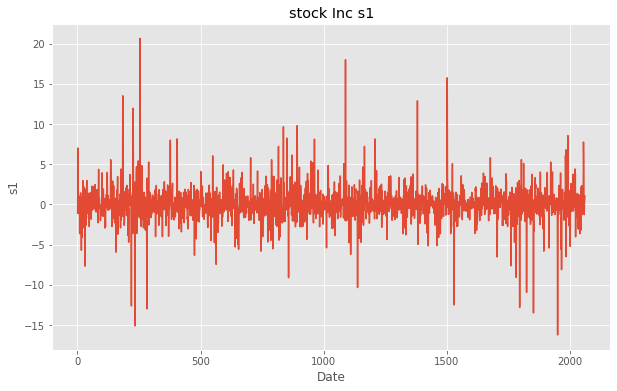

In [191]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("s1")
plt.plot(df['s1'])
plt.title("stock Inc s1")
plt.show()

In [192]:
df=df.dropna()
df.head()

,Open,High,Low,Close,s1
1,267.190002,268.109985,265.700012,266.140015,-1.059875
2,270.670013,274.519989,269.299988,273.160004,7.019989
3,273.119995,273.730011,270.660095,272.109985,-1.050018
4,272.109985,273.450012,271.839996,273.000000,0.890015
5,273.029999,274.200012,272.630005,273.859985,0.859985


##### STATIONARITY TEST -ADF(ADfuller)

In [193]:
# ADfuller Test -For checking stationary data
from statsmodels.tsa.stattools import adfuller
ADF_test=adfuller(df["s1"],autolag="AIC")
print(ADF_test)

(-43.71741594422271, 0.0, 0, 2059, {'1%': -3.433529927750221, '5%': -2.86294474297357, '10%': -2.5675178213960623}, 8930.701032194791)


 >Null Hypothesis H0: Non Stationary

 
 >Alternative Hypothesis : Stationary

In [194]:
output=pd.DataFrame(ADF_test[0:4],index=["Test Statistics","p-Value","Lag","number of observation"])
print(output)

                                 0
Test Statistics         -43.717416
p-Value                   0.000000
Lag                       0.000000
number of observation  2059.000000


##### SEASONAL DECOMPOSE

*The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. With statsmodels we will be able to see the trend, seasonal, and residual components of our data.*

In [195]:
# EDA -Graph view
from statsmodels.tsa.seasonal import seasonal_decompose
# decompose used for checking trend seasonality and error
plt.style.use('ggplot')

<Figure size 432x288 with 0 Axes>

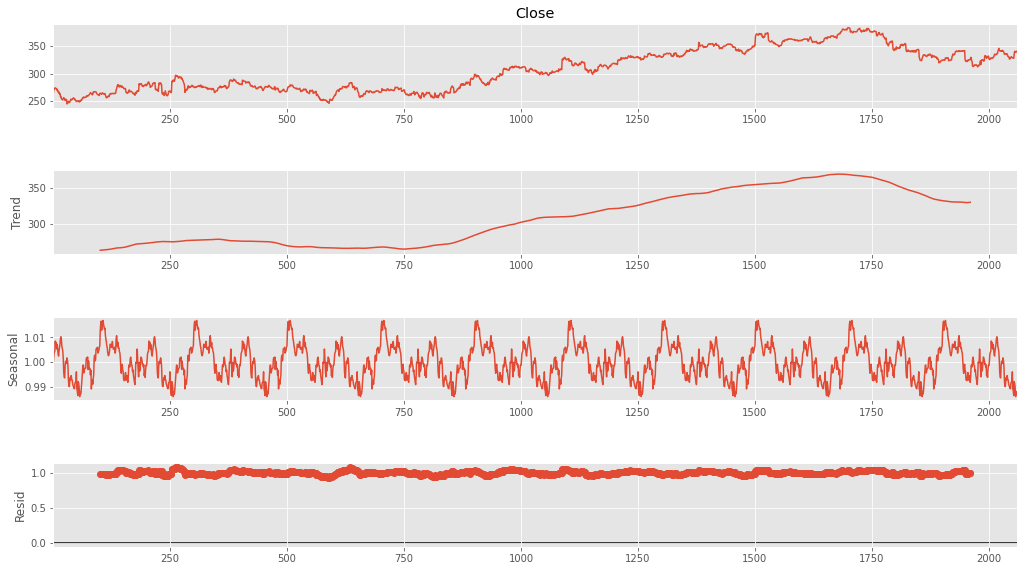

In [196]:
result = seasonal_decompose(df['Close'], model='multiplicative', freq = 200)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

##### Train Test Split

In [197]:
total_count=df.shape

In [198]:
import math
train_count=math.floor(0.8*total_count[0])
test_count=total_count[0]-train_count
train_count,test_count

(1648, 412)

In [199]:
Train=df["Close"].loc[:train_count]
Test=df["Close"].loc[(train_count+1):]

In [200]:
Test

1649    363.714996
1650    364.980011
1651    364.885010
1652    365.234985
1653    363.989807
           ...    
2056    340.200012
2057    338.929993
2058    339.149994
2059    339.885010
2060    340.899994
Name: Close, Length: 412, dtype: float64

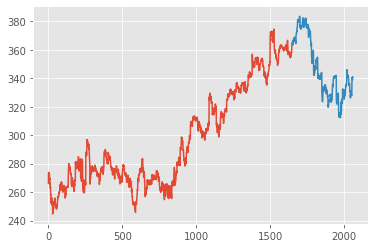

In [201]:
plt.plot(Train)
plt.plot(Test)
plt.show()

## ARIMA model

In [202]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

 For identifying p value we have use plot pacf

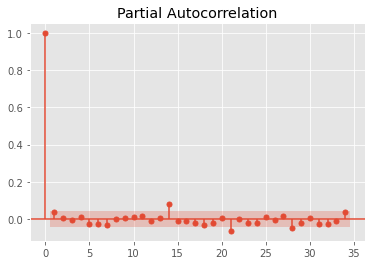

In [203]:
plot_pacf(df["s1"]);# p=0-Autoregressive

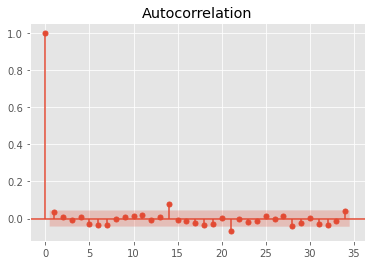

In [204]:
plot_acf(df[['s1']]); # q=0 # An MA term is technically the error of the lagged forecast

In [205]:
model_arima=ARIMA(Train,order=(0,1,0))
model_arima_fit=model_arima.fit()

In [206]:
y_pred=model_arima_fit.forecast(steps=test_count)[2]
y_pred=pd.DataFrame(y_pred)[0]
y_pred.head()

0    359.146559
1    357.473124
2    356.202774
3    355.141076
4    354.212718
Name: 0, dtype: float64

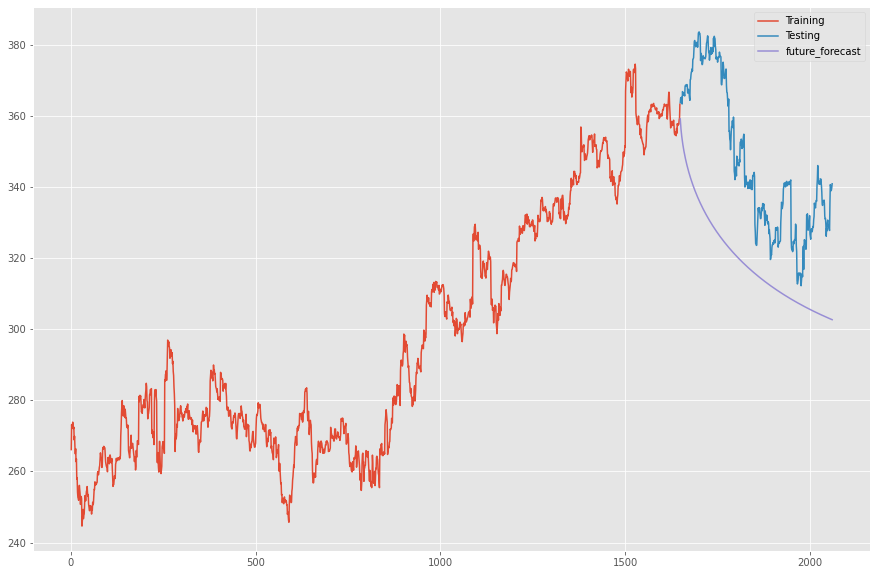

In [207]:
plt.figure(figsize=(15,10))
plt.plot(Train.index,Train,label= 'Training')
plt.plot(Test.index,Test,label= 'Testing')
plt.plot(Test.index,y_pred,label= 'future_forecast')
plt.legend()
plt.show()

##### PERFORMANCE METRICES

>MEAN SQUARED ERROR

In [208]:
from sklearn.metrics import mean_squared_error
x_arima=mean_squared_error(Test,y_pred)
x_arima

959.8740451231515

>ROOT MEAN SQUARED ERROR

In [209]:
rmse_arima=x_arima**0.5
rmse_arima

30.981834114899517

>MEAN ABSOLUTE PERCENTAGE ERROR

In [210]:
from sklearn.metrics import mean_absolute_percentage_error
mape_arima =mean_absolute_percentage_error(Test,y_pred)*100
print(mape_arima)

8.023544353684317


# Holt-Winters

In [211]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [212]:
model_hw = ExponentialSmoothing(Train,trend="add",seasonal="add", seasonal_periods=100)
fitted_model=model_hw.fit()
y_pred_hw=fitted_model.predict(start=1649,end=2060)

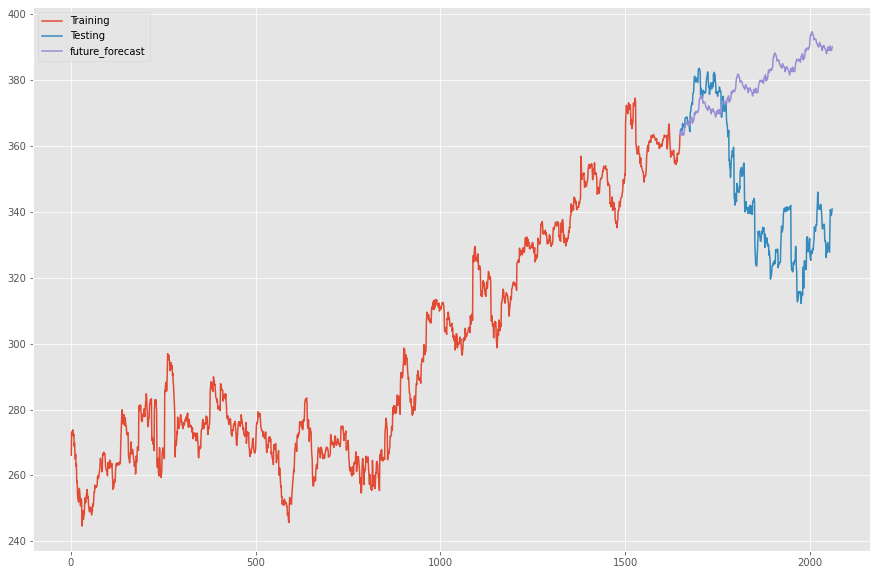

In [213]:

plt.figure(figsize=(15,10))
plt.plot(Train.index,Train,label= 'Training')
plt.plot(Test.index,Test,label= 'Testing')
plt.plot(Test.index,y_pred_hw,label= 'future_forecast')
plt.legend()
plt.show()


##### PERFORMANCE METRICES

>MEAN SQUARED ERROR

In [214]:
from sklearn.metrics import mean_squared_error
x_hw=mean_squared_error(Test,y_pred_hw)
x_hw

1806.1790255773406

>ROOT MEAN SQUARED ERROR

In [215]:
rmse_hw=x_hw**0.5
rmse_hw

42.49916499858957

>MEAN ABSOLUTE PERCENTAGE ERROR

In [216]:
from sklearn.metrics import mean_absolute_percentage_error
mape_hw =mean_absolute_percentage_error(Test,y_pred_hw)*100
print(mape_hw)

10.619090222200896


## RNN

In [217]:
from keras.models import Sequential

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))

In [220]:
dataset=min_max_scaler.fit_transform(df_yahoo['Close'].values.reshape(-1,1))

# Train and Test split

In [221]:
train_size=int(len(df_yahoo)*0.8)

In [222]:
test_size=len(df_yahoo)-train_size

In [223]:
Train=dataset[0:train_size,:]

In [224]:
Test=dataset[train_size:len(dataset),:]

In [225]:
len(Train)

1648

In [226]:
len(Test)

413

In [227]:
def create_dataset(dataset,time_step=15):
    x_ind,y_dep =[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        x_ind.append(a)
        y_dep.append(dataset[i+time_step,0])
    return np.array(x_ind),np.array(y_dep)
        

In [228]:
x_train,y_train=create_dataset(Train,time_step=15)

In [229]:
x_train.shape

(1632, 15)

In [230]:
x_test,y_test=create_dataset(Test,time_step=15)

In [231]:
y_test.shape

(397,)

In [232]:
x_test.shape

(397, 15)

*LSTM -Long short term memory -network expects the input data (x) to be provided with a specific array structure in the for of[Sample,time_steps,features ]-LSTM always works with sample timestep features*

In [233]:
x_train.shape,x_test.shape

((1632, 15), (397, 15))

In [234]:
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))

In [235]:
x_train.shape

(1632, 1, 15)

In [236]:
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [237]:
from keras.layers.core import Dense,Dropout,Activation
from keras.layers.recurrent import LSTM

In [238]:
time_step=15
model=Sequential()

In [239]:
model.add(LSTM(20,input_shape=(1,time_step)))
model.add(Dense(1))

In [240]:
model.compile(loss="mean_squared_error",optimizer='adam')

In [241]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
51/51 [==============================] - 1s 620us/step - loss: 0.0265
Epoch 2/100
51/51 [==============================] - 0s 640us/step - loss: 0.0022
Epoch 3/100
51/51 [==============================] - 0s 651us/step - loss: 0.0016
Epoch 4/100
51/51 [==============================] - 0s 657us/step - loss: 0.0015
Epoch 5/100
51/51 [==============================] - 0s 620us/step - loss: 0.0014
Epoch 6/100
51/51 [==============================] - 0s 640us/step - loss: 0.0014
Epoch 7/100
51/51 [==============================] - 0s 620us/step - loss: 0.0014
Epoch 8/100
51/51 [==============================] - 0s 620us/step - loss: 0.0013
Epoch 9/100
51/51 [==============================] - 0s 620us/step - loss: 0.0013
Epoch 10/100
51/51 [==============================] - 0s 620us/step - loss: 0.0012
Epoch 11/100
51/51 [==============================] - 0s 620us/step - loss: 0.0012
Epoch 12/100
51/51 [==============================] - 0s 620us/step - loss: 0.0011
Epoch 13/100


In [242]:
y_pred=model.predict(x_test)

In [243]:
x_test.shape

(397, 1, 15)

In [244]:
y_pred

array([[0.8754963 ],
       [0.88322866],
       [0.88472396],
       [0.88326377],
       [0.88380694],
       [0.8855601 ],
       [0.88309485],
       [0.8730697 ],
       [0.87011653],
       [0.8727413 ],
       [0.86865115],
       [0.86694604],
       [0.86113256],
       [0.856315  ],
       [0.8779717 ],
       [0.889829  ],
       [0.90158695],
       [0.90918666],
       [0.91112053],
       [0.9139956 ],
       [0.9110581 ],
       [0.927599  ],
       [0.9348994 ],
       [0.93772614],
       [0.94737756],
       [0.9629705 ],
       [0.9709244 ],
       [0.9700192 ],
       [0.9674889 ],
       [0.9613048 ],
       [0.96016765],
       [0.9582326 ],
       [0.96322954],
       [0.9636106 ],
       [0.95786697],
       [0.9614162 ],
       [0.9740674 ],
       [0.98145306],
       [0.98335123],
       [0.9816345 ],
       [0.98016876],
       [0.97369254],
       [0.9419606 ],
       [0.9380693 ],
       [0.9360444 ],
       [0.93105376],
       [0.920659  ],
       [0.917

In [245]:
y_pred_RNN=min_max_scaler.inverse_transform(y_pred)

In [246]:
y_pred_RNN

array([[366.29773],
       [367.37228],
       [367.58008],
       [367.3772 ],
       [367.45267],
       [367.6963 ],
       [367.3537 ],
       [365.9605 ],
       [365.5501 ],
       [365.91486],
       [365.34647],
       [365.1095 ],
       [364.3016 ],
       [363.63208],
       [366.64172],
       [368.28952],
       [369.92355],
       [370.97968],
       [371.2484 ],
       [371.64798],
       [371.23978],
       [373.53842],
       [374.55298],
       [374.9458 ],
       [376.28705],
       [378.454  ],
       [379.55936],
       [379.43356],
       [379.0819 ],
       [378.22253],
       [378.0645 ],
       [377.7956 ],
       [378.49   ],
       [378.54297],
       [377.74478],
       [378.23804],
       [379.99615],
       [381.02252],
       [381.28632],
       [381.04773],
       [380.8441 ],
       [379.94403],
       [375.53427],
       [374.9935 ],
       [374.7121 ],
       [374.01852],
       [372.574  ],
       [372.19638],
       [372.95493],
       [373.63556],


In [247]:
y_test=np.expand_dims(y_test,axis=1)

In [248]:
y_test=min_max_scaler.inverse_transform(y_test)

In [249]:
y_test

array([[368.57998657],
       [368.67999268],
       [368.42498779],
       [368.47000122],
       [368.79998779],
       [368.42999268],
       [366.41000366],
       [366.61999512],
       [367.45999146],
       [366.4750061 ],
       [366.26000977],
       [365.01998901],
       [364.35998535],
       [370.17999268],
       [370.25      ],
       [371.51501465],
       [372.3500061 ],
       [372.36499023],
       [373.20001221],
       [372.63000488],
       [375.92401123],
       [376.        ],
       [376.3500061 ],
       [378.66000366],
       [380.88430786],
       [381.18499756],
       [380.66000366],
       [380.53988647],
       [379.3999939 ],
       [380.16000366],
       [379.91000366],
       [380.67001343],
       [380.42001343],
       [379.29998779],
       [380.97000122],
       [383.29000854],
       [383.48498535],
       [383.6000061 ],
       [383.15200806],
       [383.16000366],
       [382.04998779],
       [375.5249939 ],
       [377.58349609],
       [377

In [250]:
def plot_pred(test,predicted):
    plt.plot(test,color='red',label='Actual FB stock price')
    plt.plot(predicted,color='blue',label="RNN predicted stock price")
    plt.xlabel('Time')
    plt.ylabel("Price")
    plt.legend()
    plt.show()

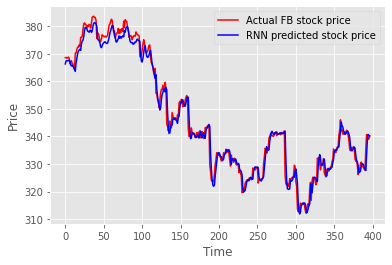

In [251]:
plot_pred(y_test,y_pred_RNN)

##### PERFORMANCE METRICES

>MEAN SQUARED ERROR

In [252]:
from sklearn.metrics import mean_squared_error
x_rnn=mean_squared_error(y_test,y_pred_RNN)
x_rnn

8.02140774453758

>ROOT MEAN SQUARED ERROR

In [253]:
rmse_rnn=x_rnn**0.5
rmse_rnn

2.8322089867341322

>MEAN ABSOLUTE PERCENTAGE ERROR

In [254]:
from sklearn.metrics import mean_absolute_percentage_error
mape_rnn =mean_absolute_percentage_error(y_test,y_pred_RNN)*100
print(mape_rnn)

0.5672954440974122


> Next 20 hours prediction

In [255]:
df1=df_yahoo.drop(["Volume","Open","High","Low"],axis=1)
df1.head(2)

,Close
Date,
2020-09-14 14:30:00-04:00,267.199890
2020-09-14 15:30:00-04:00,266.140015


In [256]:
a=300
b=df1[(2061-a):]
b.shape


(300, 1)

In [257]:
new_data = df1.iloc[-301:-1]
last60prices=np.array(new_data)

In [258]:
last60prices=last60prices.reshape(-1, 1)

In [259]:
last60prices.shape

(300, 1)

In [260]:
X_60=min_max_scaler.transform(last60prices)

In [261]:
NumSamples=20
TimeSteps=15
NumFeatures=1
X_60=X_60.reshape(NumSamples,NumFeatures,TimeSteps)

In [262]:
X_60.shape

(20, 1, 15)

In [263]:
x_test.shape

(397, 1, 15)

In [264]:
predicted_Price = model.predict(X_60)
predicted_Price = min_max_scaler.inverse_transform(predicted_Price)
predicted_Price

array([[368.76477],
       [356.00497],
       [346.2717 ],
       [352.26437],
       [340.44476],
       [344.37225],
       [332.6273 ],
       [331.73883],
       [319.7676 ],
       [328.97314],
       [336.2807 ],
       [340.96005],
       [320.98038],
       [314.89255],
       [322.20917],
       [331.75906],
       [335.16617],
       [341.96628],
       [326.76437],
       [340.36218]], dtype=float32)

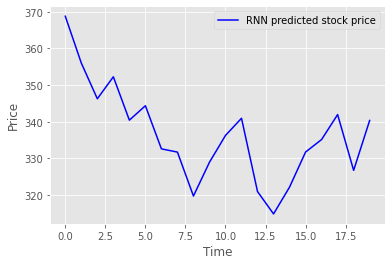

In [265]:
plt.plot(predicted_Price,color='blue',label="RNN predicted stock price")
plt.xlabel('Time')
plt.ylabel("Price")
plt.legend()
plt.show()

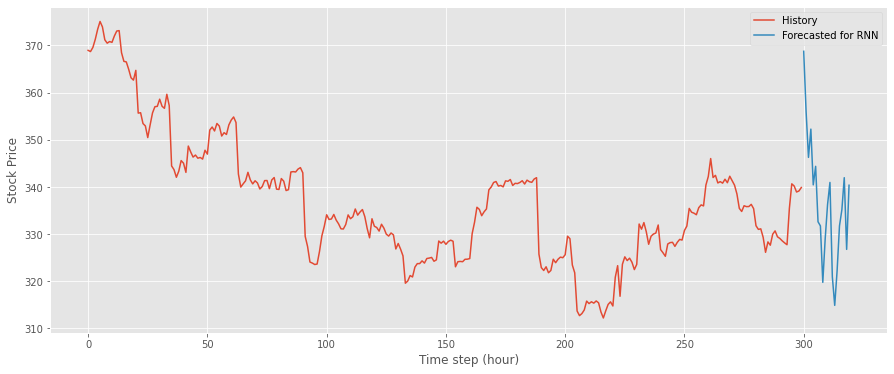

In [266]:
def plot_multi_step(history, prediction1):
    
    plt.figure(figsize=(15, 6))
    
    range_history = len(history)
    range_future = list(range(range_history, range_history +
                        len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), 
             label='History')
    plt.plot(range_future, np.array(prediction1),
             label='Forecasted for RNN')
      
    plt.legend(loc='upper right')
    plt.xlabel('Time step (hour)')
    plt.ylabel('Stock Price')
        
plot_multi_step(new_data, predicted_Price)

In [269]:
Rmse_data={"model":["ARIMA","Holt_Winters","LSTM"],"Rmse_value":[rmse_arima,rmse_hw,rmse_rnn]}

In [270]:
Rmse_data=pd.DataFrame(Rmse_data)
Rmse_data

,model,Rmse_value
0,ARIMA,30.981834
1,Holt_Winters,42.499165
2,LSTM,2.832209


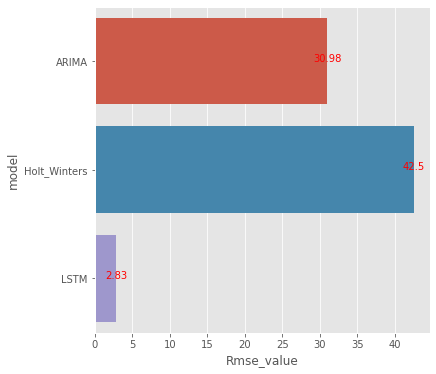

In [271]:
plt.figure(figsize=(6,6))
R=sns.barplot(x="Rmse_value",y="model",data=Rmse_data)
for index, row in Rmse_data.iterrows():
    R.text(row.Rmse_value,row.name, round(row.Rmse_value,2), color='Red', ha="center")

In [272]:
MAPE_data={"model":["ARIMA","Holt_Winters","LSTM"],"MAPE_value":[mape_arima,mape_hw,mape_rnn]}

In [273]:
MAPE_data=pd.DataFrame(MAPE_data)
MAPE_data

,model,MAPE_value
0,ARIMA,8.023544
1,Holt_Winters,10.619090
2,LSTM,0.567295


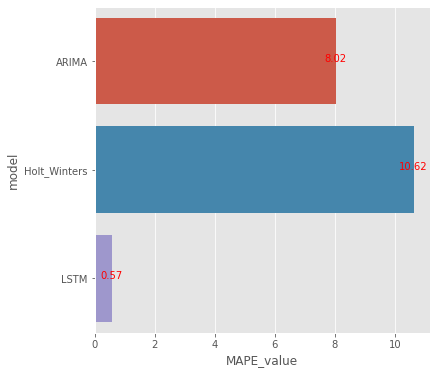

In [274]:
plt.figure(figsize=(6,6))
M=sns.barplot(x="MAPE_value",y="model",data=MAPE_data)
for index, row in MAPE_data.iterrows():
    M.text(row.MAPE_value,row.name, round(row.MAPE_value,2), color='red', ha="center")

Finally by comparing all models LSTM gives better results



---


